In [47]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
import matplotlib.pyplot as plt
import matplotlib.image as img
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
from IPython.display import Image

# Structure de bande électronique du RbDyO2

In [48]:
with MPRester("SsRPm7BKULyAwhtl") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-7476")

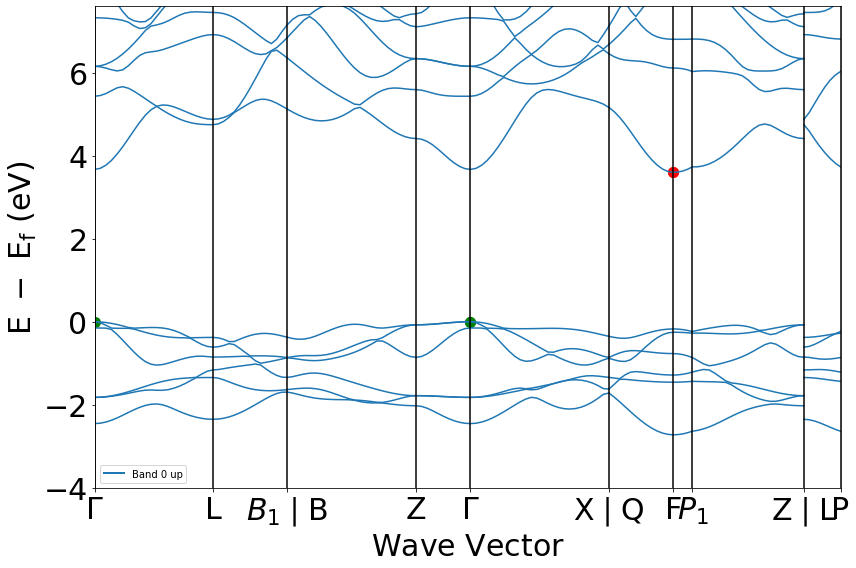

In [49]:
plot = BSPlotter(bandstructure)
plot.get_plot(vbm_cbm_marker=True)
bandGap = bandstructure.get_band_gap()

# Représentation de la zone de Brillouin

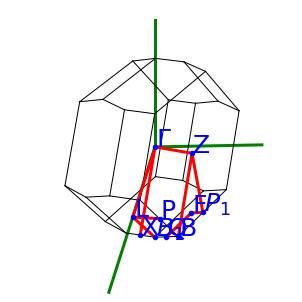

In [50]:
BSPlotter(bandstructure).plot_brillouin()

# Analyse de la bande interdite

In [51]:
print(bandGap)

{'direct': False, 'energy': 3.6020000000000003, 'transition': '\\Gamma-F'}


La bande interdite a une énergie de 3.602 eV, ce qui implique que le cristal a un comportement isolant d'un point de vue électrique. 
La bande interdite est indirecte. De plus, le vecteur d'onde évolue selon une direction $\Gamma-F$ dans la bande interdite. On peut donc conclure que le minimum de la bande de conduction et le maximum de la bande de valence correspondent à des vecteurs d'onde différents.

# Analyse de la dernière bande de valence

In [52]:
print(bandstructure.get_vbm().get('band_index'))
print('VBM energy :', bandstructure.get_vbm().get('energy'))

defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]})
VBM energy : 1.2797


La maximum de la bande de valence a une énergie de 1.2797 eV. Les bandes 13 et 14 sont celles qui contiennent le maximum de la bande de valence. La bande 14 est donc la dernière bande de valence.

# Analyse de la première bande de conduction

In [53]:
print(bandstructure.get_cbm().get('band_index'))
print('CBM energy :', bandstructure.get_cbm().get('energy'))

defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})
CBM energy : 4.8817


Le minimum de la bande de conduction a une énergie de 4.8817 eV. La bande 15 est celle qui contient le minimum de la bande de conduction. La bande 15 est donc la première bande de conduction.

# Analyse de la dispersion : direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion

In [54]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 14

inf = 100
sup = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf ):
        inf = delta
        indice_inf = i 
    if (delta > sup):
        sup = delta
        indice_sup = i
        
print('Delta maximum :', sup ,'pour indice qui vaut :', indice_sup)
print('Delta minimum :', inf, 'pour indice qui vaut :', indice_inf)

Delta maximum : 0.4410190543838833 pour indice qui vaut : 8
Delta minimum : 0.0061241359149292835 pour indice qui vaut : 1


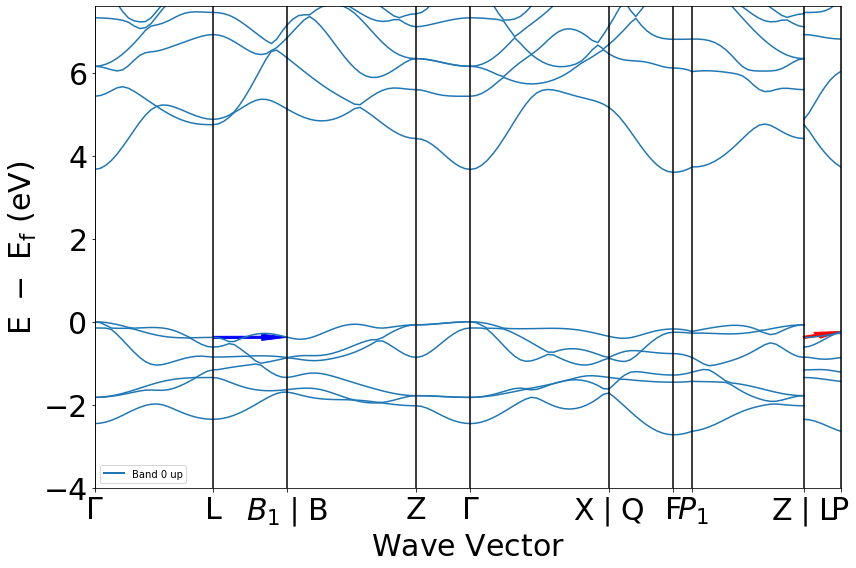

In [55]:
dist0 = distance[indice_inf][0]
dist1 = distance[indice_inf][-1]
dist2 = distance[indice_sup][0]
dist3 = distance[indice_sup][-1]
energy0 = energy[indice_inf][index][0]
energy1 = energy[indice_inf][index][-1]
energy2 = energy[indice_sup][index][0]
energy3 = energy[indice_sup][index][-1]

plot1 = BSPlotter(bandstructure).get_plot()

plt.arrow(dist0,energy0,dist1 - dist0, energy1 - energy0,color='b',width=0.05,length_includes_head=True)
plt.arrow(dist2,energy2,dist3 - dist2, energy3 - energy2,color='r',width=0.05,length_includes_head=True)

La dernière bande de valence présente donc le plus de dispersion dans la direction $Z|L-P$ et le moins de dispersion dans la direction $L-B_1|B$. La dispersion maximale vaut 0.4410190543838833 et la dispersion minimale vaut 0.0061241359149292835.

# Analyse de la dispersion : direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion

In [56]:
infos = plot.bs_plot_data()
energy = infos.get('energy')['1']
distance = infos.get('distances')

index = 15

inf1 = 100
sup1 = -100

for i in range (9): 
    delta = abs(((energy[i][index][-1]-energy[i][index][0]))/(distance[i][-1]-distance[i][0]))
    if (delta < inf1 ):
        inf1 = delta
        indice_inf1 = i 
    if (delta > sup1):
        sup1 = delta
        indice_sup1 = i
        
print('Delta maximum : ', sup1,'pour indice qui vaut :', indice_sup1)
print('Delta minimum : ', inf1,'pour indice qui vaut :', indice_inf1)

Delta maximum :  3.1509324854646286 pour indice qui vaut : 8
Delta minimum :  0.5756687760033513 pour indice qui vaut : 1


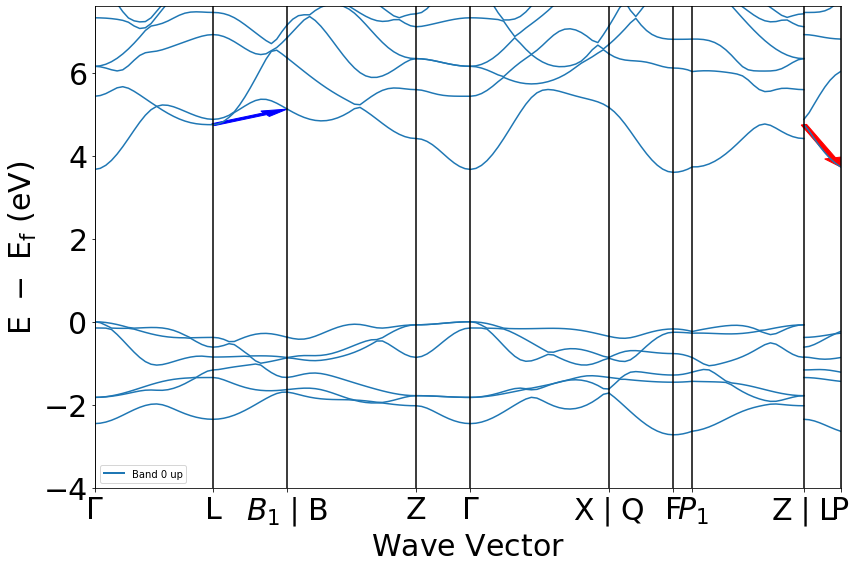

In [57]:
plot2 = BSPlotter(bandstructure).get_plot()

dist0 = distance[indice_inf1][0]
dist1 = distance[indice_inf1][-1]
dist2 = distance[indice_sup1][0]
dist3 = distance[indice_sup1][-1]
energy0 = energy[indice_inf1][index][0]
energy1 = energy[indice_inf1][index][-1]
energy2 = energy[indice_sup1][index][0]
energy3 = energy[indice_sup1][index][-1]

plt.arrow(dist2,energy2, dist3 - dist2, energy3 - energy2,color='r',width=0.05,length_includes_head=True)
plt.arrow(dist0,energy0, dist1 - dist0, energy1 - energy0,color='b',width=0.05,length_includes_head=True)

La première bande de conduction présente donc le plus de dispersion dans la direction $Z|L-P$ et le moins de dispersion dans la direction $L-B_1|B$. La dispersion maximale vaut 3.1509324854646286 et la dispersion minimale vaut 0.5756687760033513.

# Calcul de la masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction

Pour calculer la masse effective, nous utilisons la formule suivante :

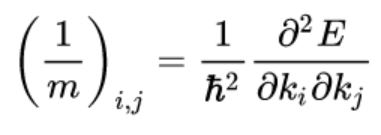

In [58]:
Image(filename = 'Formule_masse_effective.JPG')

# Masse effective au sommet de la dernière bande de valence

In [59]:
[x1,y1] = [distance[indice_sup][0],energy[indice_sup][14][0]]     
[x2,y2] = [distance[indice_sup-2][0],energy[indice_sup-2][14][0]] 
[x3,y3] = [distance[indice_sup-4][0],energy[indice_sup-4][14][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = (1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective =', masse, 'kg')

masse effective = -1.264012257819963e-28 kg


# Masse effective à la base de la première bande de conduction

In [60]:
[x1,y1] = [distance[indice_inf1][0],energy[indice_inf1][15][0]]     
[x2,y2] = [distance[indice_inf1-2][0],energy[indice_inf1-2][15][0]] 
[x3,y3] = [distance[indice_inf1-4][0],energy[indice_inf1-4][15][0]] 

a, b, c = np.polyfit([x1, x2, x3], [y1, y2, y3], 2)        
                                
masse = (1.054571818*10**(-34))**2/(2*a*(10**(-20)*1.602176563*10**(-19)))                        
print('masse effective =', masse, 'kg')

masse effective = 1.4097657566819696e-29 kg
